In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
np.version.version

'1.23.5'

In [70]:
pd.__version__

'1.5.1'

In [71]:
df = pd.read_csv('CSV/pokedex_(Update_05.20).csv', index_col=0)

In [72]:
df

,pokedex_number,name,german_name,japanese_name,generation,status,species,type_number,type_1,type_2,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,Normal,Seed Pokémon,2,Grass,Poison,...,1.0,2.0,2.0,1.00,1.00,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,Normal,Lizard Pokémon,1,Fire,NaN,...,2.0,1.0,1.0,0.50,2.00,1.0,1.0,1.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fairy,NaN,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,889,Zamazenta Crowned Shield,NaN,NaN,8,Legendary,Warrior Pokémon,2,Fighting,Steel,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,889,Zamazenta Hero of Many Battles,NaN,NaN,8,Legendary,Warrior Pokémon,1,Fighting,NaN,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,890,Eternatus,NaN,NaN,8,Legendary,Gigantic Pokémon,2,Poison,Dragon,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


In [73]:
col_names = [
    'pokedex_number', 'name', 'generation',
    'status', 'type_number', 'type_1',
    'type_2', 'height_m', 'weight_kg',
    'abilities_number', 'ability_1', 'ability_2',
    'ability_hidden', 'total_points', 'hp',
    'attack', 'defense', 'sp_attack',
    'sp_defense', 'speed', 'catch_rate',
    'base_experience', 'percentage_male'
]

In [74]:
filtered_pokemon_data = pd.DataFrame(df, columns=col_names)

In [75]:
filtered_pokemon_data

,pokedex_number,name,generation,status,type_number,type_1,type_2,height_m,weight_kg,abilities_number,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male
0,1,Bulbasaur,1,Normal,2,Grass,Poison,0.7,6.9,2,...,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5
1,2,Ivysaur,1,Normal,2,Grass,Poison,1.0,13.0,2,...,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5
2,3,Venusaur,1,Normal,2,Grass,Poison,2.0,100.0,2,...,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5
3,3,Mega Venusaur,1,Normal,2,Grass,Poison,2.4,155.5,1,...,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5
4,4,Charmander,1,Normal,1,Fire,NaN,0.6,8.5,2,...,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,8,Legendary,1,Fairy,NaN,2.8,110.0,1,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1024,889,Zamazenta Crowned Shield,8,Legendary,2,Fighting,Steel,2.9,785.0,1,...,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN
1025,889,Zamazenta Hero of Many Battles,8,Legendary,1,Fighting,NaN,2.9,210.0,1,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1026,890,Eternatus,8,Legendary,2,Poison,Dragon,20.0,950.0,1,...,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN


In [76]:
# Linking genreration number to publish date (JP)
years = [1996, 1999, 2002, 2006, 2010, 2013, 2016, 2019]

# inserisco la colonna (sarà la 3°) che si chiamerà date_published passandoli come valore il mapping dato dal
# dizionario creato con enumerate (con lista di anni e index)
filtered_pokemon_data.insert(2, column='date_published', value=filtered_pokemon_data.generation.map(dict(enumerate(years, start=1))))
filtered_pokemon_data.to_csv('CSV/filtered_pokemon_data_years.csv', index=False)


filtered_pokemon_data

,pokedex_number,name,date_published,generation,status,type_number,type_1,type_2,height_m,weight_kg,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male
0,1,Bulbasaur,1996,1,Normal,2,Grass,Poison,0.7,6.9,...,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5
1,2,Ivysaur,1996,1,Normal,2,Grass,Poison,1.0,13.0,...,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5
2,3,Venusaur,1996,1,Normal,2,Grass,Poison,2.0,100.0,...,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5
3,3,Mega Venusaur,1996,1,Normal,2,Grass,Poison,2.4,155.5,...,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5
4,4,Charmander,1996,1,Normal,1,Fire,NaN,0.6,8.5,...,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,2019,8,Legendary,1,Fairy,NaN,2.8,110.0,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1024,889,Zamazenta Crowned Shield,2019,8,Legendary,2,Fighting,Steel,2.9,785.0,...,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN
1025,889,Zamazenta Hero of Many Battles,2019,8,Legendary,1,Fighting,NaN,2.9,210.0,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1026,890,Eternatus,2019,8,Legendary,2,Poison,Dragon,20.0,950.0,...,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN


## sostituisci counter

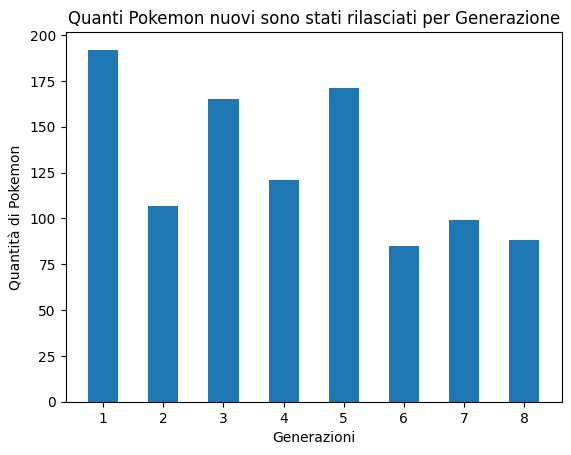

In [77]:
# vogliamo rappresentare quanti pokemon sono stati rilasciati per ogni generazione, in questo caso 8,

from collections import Counter
generations = filtered_pokemon_data.generation.values.tolist()
generations = Counter(generations)
plt.title("Quanti Pokemon nuovi sono stati rilasciati per Generazione")
plt.xlabel('Generazioni')
plt.ylabel('Quantità di Pokemon')
plt.bar(generations.keys(), generations.values(), width=0.5,)
plt.show()

# RIFINIRE LA LABLE (QUESTO GRAFICO NON VUOL DIRE UN CAZZO)

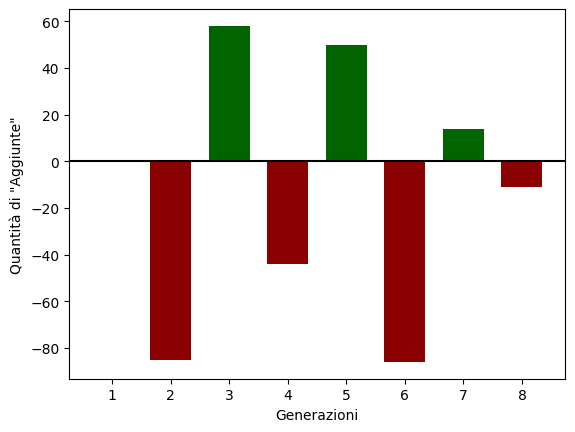

In [189]:

pippo_franco = list(generations.values())

pippo_franco.insert(0, pippo_franco[0])

result = [y - x for x, y in zip(pippo_franco, pippo_franco[1:])]

plt.xlabel("Generazioni")
plt.ylabel('Quantità di "Aggiunte"')

colors =[]
[colors.append('darkgreen') if r > 0 else colors.append('darkred') for r in result]

plt.bar(generations.keys(), result, width=0.7, color=colors)
plt.axhline(y=0, color='black')
plt.show()





# si evince come nelle genereazioni "dispari", prendendo come punto 0 il numero di pokemon
# della generazione 1, si abbia un maggior incremento di pokemon rispetto alle generazioni "pari"

In [79]:
generations

Counter({1: 192, 2: 107, 3: 165, 4: 121, 5: 171, 6: 85, 7: 99, 8: 88})

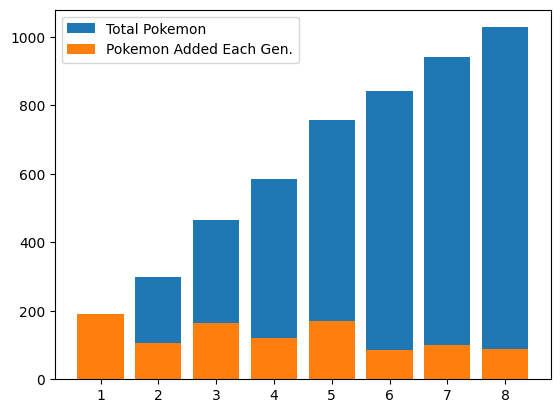

In [146]:
# Mettiamo a confronto l'incremento generazionale di pokemon con quanti sono stati effettivamente
# aggiunti per generazione

pkmn_x_generation = pd.Series(generations.values())

total_pkmn_gen_to_gen = [pd.Series(list(generations.values())[:i]).sum() for i in generations.keys()]

plt.bar(generations.keys(),total_pkmn_gen_to_gen)
plt.bar(generations.keys(), generations.values())
plt.legend(['Total Pokemon', 'Pokemon Added Each Gen.'])
plt.show()

In [81]:
filtered_pokemon_data

,pokedex_number,name,date_published,generation,status,type_number,type_1,type_2,height_m,weight_kg,...,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_experience,percentage_male
0,1,Bulbasaur,1996,1,Normal,2,Grass,Poison,0.7,6.9,...,318.0,45.0,49.0,49.0,65.0,65.0,45.0,45.0,64.0,87.5
1,2,Ivysaur,1996,1,Normal,2,Grass,Poison,1.0,13.0,...,405.0,60.0,62.0,63.0,80.0,80.0,60.0,45.0,142.0,87.5
2,3,Venusaur,1996,1,Normal,2,Grass,Poison,2.0,100.0,...,525.0,80.0,82.0,83.0,100.0,100.0,80.0,45.0,236.0,87.5
3,3,Mega Venusaur,1996,1,Normal,2,Grass,Poison,2.4,155.5,...,625.0,80.0,100.0,123.0,122.0,120.0,80.0,45.0,281.0,87.5
4,4,Charmander,1996,1,Normal,1,Fire,NaN,0.6,8.5,...,309.0,39.0,52.0,43.0,60.0,50.0,65.0,45.0,62.0,87.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,888,Zacian Hero of Many Battles,2019,8,Legendary,1,Fairy,NaN,2.8,110.0,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1024,889,Zamazenta Crowned Shield,2019,8,Legendary,2,Fighting,Steel,2.9,785.0,...,720.0,92.0,130.0,145.0,80.0,145.0,128.0,NaN,NaN,NaN
1025,889,Zamazenta Hero of Many Battles,2019,8,Legendary,1,Fighting,NaN,2.9,210.0,...,670.0,92.0,130.0,115.0,80.0,115.0,138.0,NaN,NaN,NaN
1026,890,Eternatus,2019,8,Legendary,2,Poison,Dragon,20.0,950.0,...,690.0,140.0,85.0,95.0,145.0,95.0,130.0,NaN,NaN,NaN


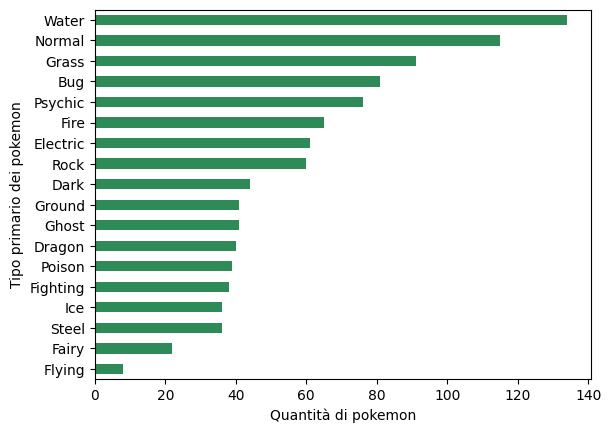

In [134]:
pokemon_for_type = filtered_pokemon_data.groupby("type_1")["name"].count()
pokemon_for_type_sorted = pokemon_for_type.sort_values(ascending=True).plot(kind="barh", color= 'seagreen')

plt.ylabel('Tipo primario dei pokemon')
plt.xlabel('Quantità di pokemon')

plt.show()

# Si evince come il tipo dominante di pokemon è il tipo Acqua, per un team ottimale, avere un tipo "Elettro", 
# in media aumenta la probabilità di vincere 

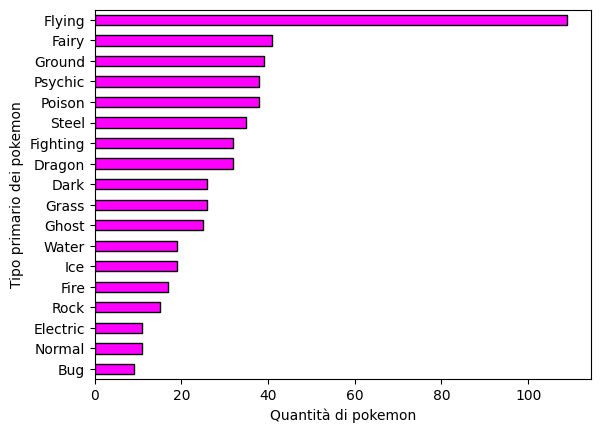

In [141]:
pokemon_for_type_2 = filtered_pokemon_data.groupby("type_2")['name'].count()
pokemon_for_type_2_sorted = pokemon_for_type_2.sort_values(ascending=True).plot(kind="barh", color='fuchsia', edgecolor='black')

plt.ylabel('Tipo primario dei pokemon')
plt.xlabel('Quantità di pokemon')

plt.show()

# il tipo secondario più comune è il tipo volante, che tra l'altro è il tipo primario meno diffuso